In [1]:
import numpy as np
import matplotlib.pyplot as plt

# funcion coseno realzado
def rc(t, Beta, T):
    # t     :tiempo
    # Beta  :rollof
    # T     : periodo entre simbolos
    return 1/T * np.sinc(t/T) * np.cos(np.pi * Beta * t / T) / (1 - (2 * Beta * t / T)**2)

# funcion raiz cose realzado
def rrc(t, Beta, T):
    # t     :tiempo
    # Beta  :rollof
    # T     : periodo entre simbolos
    return 4 * Beta / (np.pi * np.sqrt(T)) * (np.cos((1 + Beta) * np.pi * t / T) + (1 - Beta) * np.pi / (4 * Beta) * np.sinc((1 - Beta) * t / T)) / (1 - (4 * Beta * t/T)**2)

# implementacion de filtro
def rcosdesign(simbolos, Beta, T, tt, mode):
    # simbolos  : simbolos a conformar/transmitir
    # Beta      : rollof, factor de exceso de ancho de banda
    # T         : periodo entre simbolos
    # tt        : vector de tiempos
    # mode      : tipo de filtro a usar "normal" -> RC | "sqrt" -> RRC
    # Retorna senial conformada y aporte de cada simbolo

    T = T + 1E-9
    signal_added = np.zeros(len(tt))
    signal = np.zeros([len(simbolos), len(tt)])

    filtro = rc if mode == "normal" else rrc

    for i in range(len(simbolos)):
        signal[i] = simbolos[i] + filtro(tt-T*i, Beta, T)
        signal_added += signal[i]

    return signal_added, signal

In [2]:
def plotSpect(signal,samplingRate):
    plt.subplots(figsize=(15, 3))
    plt.grid()
    plt.title("Power Spectral Density")
    plt.psd(signal, len(signal), samplingRate, color='C1')
    plt.show()

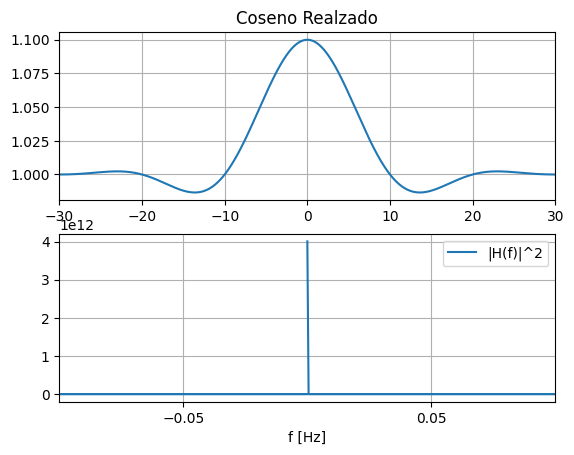

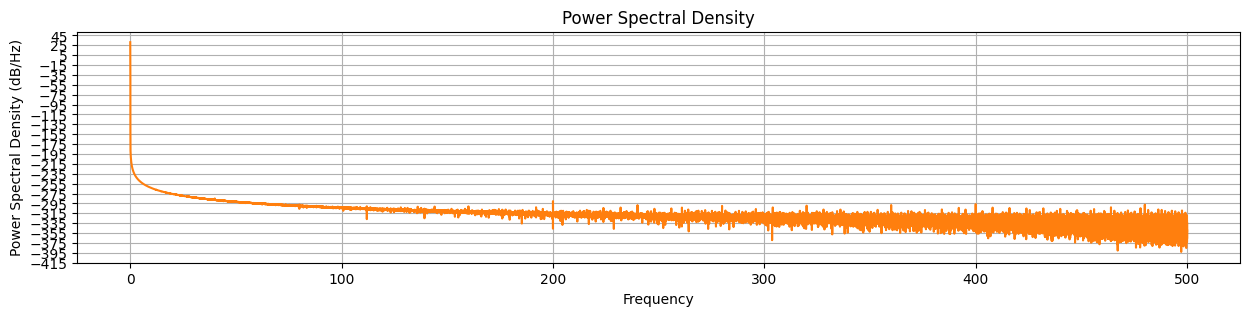

([<matplotlib.axis.XTick at 0x228809b5d90>,
 [Text(-0.05, 0, '−0.05'), Text(0.05, 0, '0.05')])

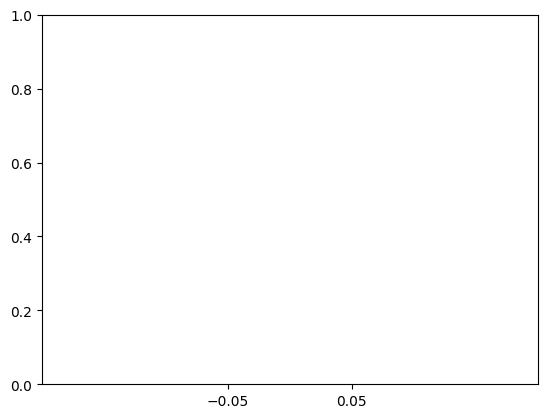

In [3]:
from scipy import signal as sg

T = 10
Beta = 0.5

simbolos = [1]
tt = np.arange(-100 * T, 100 * T, 1/1000)
signal_added, signals = rcosdesign(simbolos, Beta, T, tt, "normal")
scale_factor = max(abs(signals[0]))

# analisis en tiempo
plt.figure()
plt.subplot(2, 1, 1)
plt.title("Coseno Realzado")
plt.plot(tt, signal_added)
plt.grid()
plt.xlim([-3*T, 3*T])
# frecuencia
H_f2 = (abs(np.fft.fft(signal_added, len(signal_added)))**2)
#H_f2 = sg.lfilter(b=np.hamming(25), a=1, x=H_f2)
plt.subplot(2, 1, 2)
plt.grid()
plt.plot(np.fft.fftfreq(len(signal_added), abs(tt[0] - tt[1])), H_f2)
plt.legend(["|H(f)|^2"])
plt.xlim([-2/(2*T), 2/(2*T)])
plt.xticks([-1/(2*T), 1/(2*T)])
plt.xlabel("f [Hz]")
# densidad espectral de potencia
plotSpect(signal_added, 1/abs(tt[0] - tt[1]))
plt.xlim([-4/(2*T), 4/(2*T)])
plt.xticks([-1/(2*T), 1/(2*T)])